# Tugas 8 Data Wrangling - Data Preprocessing

* Silakan download dan kerjakan soal berikut dimanapun (laptop pribadi/google colab/etc.)
* Setelah selesai mengerjakan, upload file ini di tempat yang telah disediakan pada platform.
* Beri nama file seperti berikut: {username}-wrangling-8.ipynb
* Contoh: johndoe-ab12-wrangling-8.ipynb
* Tutorial: https://discourse.pacmann.ai/t/pengumuman-seluruh-platform-pacmann-ai/409
* Username dapat dilihat di dalam akun anda.
* Mohon jangan mengubah nama variabel yang telah diberikan.
* Namun anda diperbolehkan untuk menambah variabel apapun.
---

In [1]:
# Import packages, jika ada yang ingin disesuaikan silakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Ignore warnings
import warnings as wrn
wrn.filterwarnings('ignore', category = DeprecationWarning) 
wrn.filterwarnings('ignore', category = FutureWarning) 
wrn.filterwarnings('ignore', category = UserWarning) 

1. Import data `train.csv` dari data yang diberikan! 

In [2]:
# Import data, house price
df = pd.read_csv('data_8/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Cek kolom nama.
df.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

Penjelasan lengkap mengenai makna dari tiap variabel dapat dilihat [disini](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

2. Cek jumlah data dan persentase jumlah data NaN dari tiap-tiap kolom

In [4]:
# Add whatever you want
missing_data = pd.DataFrame({'Total':df.isna().sum(),
                           'Percent':df.isna().sum()/len(df)*100}).sort_values(by=['Total','Percent'],
                                                                           ascending=False)
missing_data.head(20)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageQual,81,5.547945


3. Dari hasil diatas, `PoolQC, MiscFeature, Alley, Fence, FireplaceQu` memiliki lebih dari 40% data yang kosong. Buanglah kolom-kolom tersebut.

In [5]:
df = df.drop(df.columns[df.isna().sum()/len(df)>0.4],axis=1)

In [6]:
len(df.columns.values)

76

In [7]:
# Mengambil nama kolom yang masih memiliki nilai kosong
# Add whatever you want
missing_columns = [col for col in df.columns if df[col].isnull().any()]
missing_columns

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

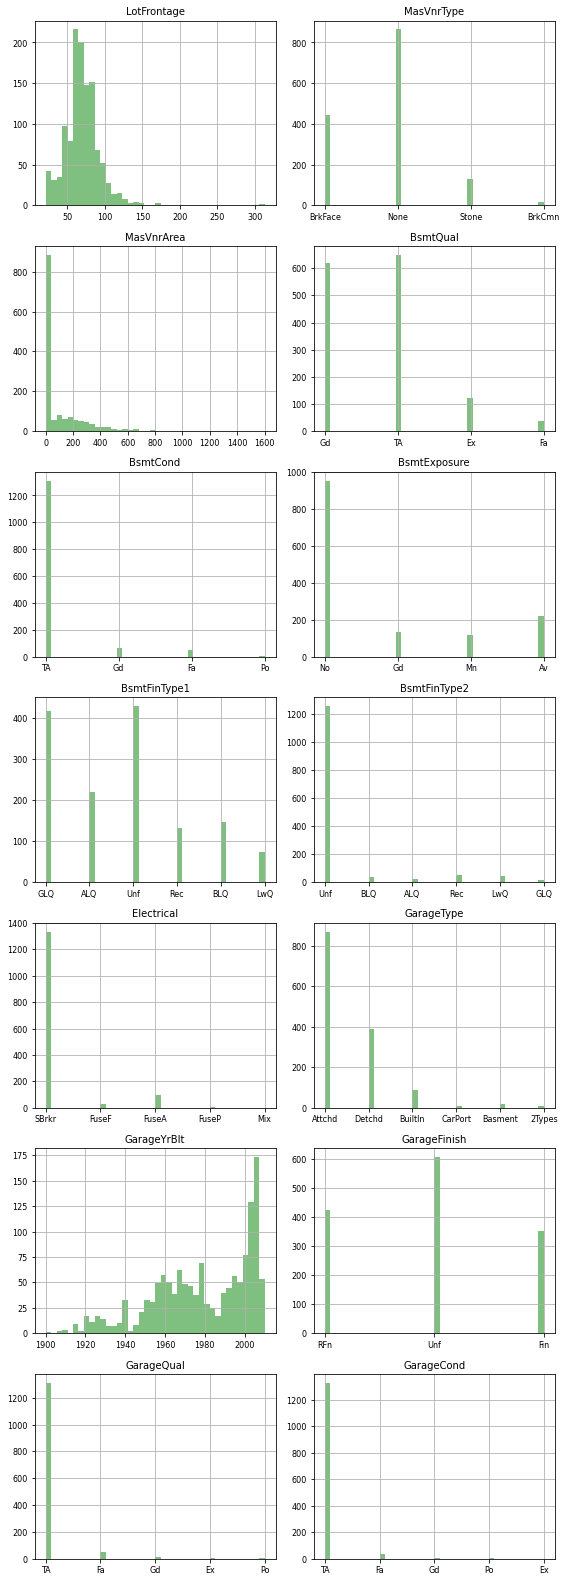

In [8]:
# Untuk mengetahui distribusi data dari data missing_columns, lakukan visualisasi, JANGAN DIUBAH!
from collections import Counter

def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        try:
            df[var_name].hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (8, 24))
        except:
            cnt = Counter(df[var_name])
            cnt.hist(bins=40,ax=ax,color = 'green',alpha=0.5, figsize = (8, 24))
        ax.set_title(var_name, fontsize = 10)
        ax.tick_params(axis = 'both', which = 'major', labelsize = 8)
        ax.tick_params(axis = 'both', which = 'minor', labelsize = 8)
        ax.set_xlabel('')
    fig.tight_layout(rect = [0, 0.03, 1, 0.95])  # Improves appearance a bit.
    plt.show()

draw_histograms(df, missing_columns, 7, 2)

4.  Lakukanlah imputasi pada data-data tersebut. Dari plot tersebut, kita dapat mengobservasi ada 2 jenis tipe data. Yaitu data numerikal yang kontinu dan data yang merepresentasikan kategori. Untuk simplisitas tugas lakukanlah:

    a. Imputasi median untuk variabel `["LotFrontage","GarageYrBlt","MasVnrArea"]`

In [9]:
# Your code here
df.loc[:,['GarageYrBlt','LotFrontage','MasVnrArea']] = df.loc[:,['GarageYrBlt','LotFrontage','MasVnrArea']].fillna(df.median())

b. Imputasi mode untuk variabel `['GarageFinish', 'GarageType', 'GarageCond', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']`

In [10]:
# Your code here
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [11]:
# Cek jumlah data NaN, bisa copy dari code sebelumnya
# Add whatever you want
missing_data = pd.DataFrame({'Total':df.isna().sum(),
                           'Percent':df.isna().sum()/len(df)*100})
missing_data.head(20)

,Total,Percent
Id,0,0.0
MSSubClass,0,0.0
MSZoning,0,0.0
LotFrontage,0,0.0
LotArea,0,0.0
Street,0,0.0
LotShape,0,0.0
LandContour,0,0.0
Utilities,0,0.0
LotConfig,0,0.0


5. Di dalam `df`, terdapat banyak tipe data. Namun, secara umum dapat dibedakan menjadi numerik dan non-numerik. Pisahkan kedua tipe data tersebut ke dua dataframe yang berbeda.

a. dataframe numerik

In [12]:
# Add whatever you want
numerical_df = df[df._get_numeric_data().columns]
numerical_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


b. dataframe kategorikal

In [13]:
categorical_df = df.drop(df._get_numeric_data().columns, axis=1)
categorical_df.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


6. Secara Ideal, kita seharusnya mengecek distribusi dari masing-masing fitur pada dataframe numerik dan melakukan proses yang menurut kita sesuai (e.g. Outlier processing, normalisasi, transformasi logaritmik, dll). Namun, sebagai simplifikasi untuk tugas:

a. Lakukanlah normalisasi dengan standard score untuk variabel/fitur `1stFlrSF`

<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

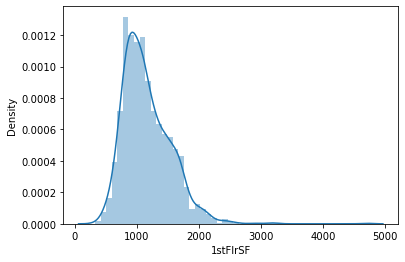

In [14]:
# Distribusi sebelum
sns.distplot(numerical_df['1stFlrSF'])

In [16]:
# Your code here

min_1stFlrSF = numerical_df['1stFlrSF'].min()
max_1stFlrSF = numerical_df['1stFlrSF'].max()
numerical_df['1stFlrSF'] = (numerical_df['1stFlrSF']-min_1stFlrSF)/(max_1stFlrSF-min_1stFlrSF)
numerical_df['1stFlrSF']

<ipython-input-16-3c13981c116b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['1stFlrSF'] = (numerical_df['1stFlrSF']-min_1stFlrSF)/(max_1stFlrSF-min_1stFlrSF)


0       0.119780
1       0.212942
2       0.134465
3       0.143873
4       0.186095
          ...   
1455    0.142038
1456    0.399036
1457    0.195961
1458    0.170721
1459    0.211565
Name: 1stFlrSF, Length: 1460, dtype: float64

<AxesSubplot:xlabel='1stFlrSF', ylabel='Density'>

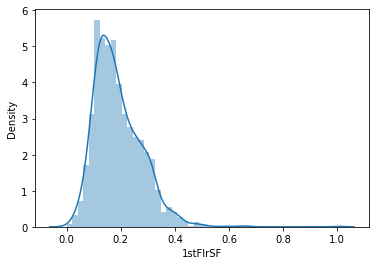

In [17]:
# Distribusi sesudah
sns.distplot(numerical_df['1stFlrSF'])

b. Lakukanlah transformasi logaritma natural pada variabel `LotArea` 

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

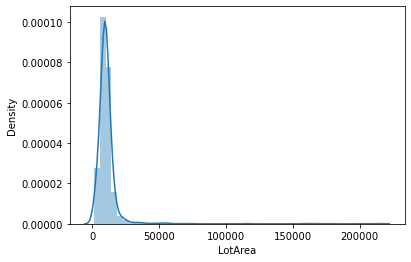

In [18]:
# Distribusi sebelum
sns.distplot(numerical_df['LotArea'])

In [19]:
# Ketika pakai log, jangan lupa ditambahkan + 1, karena ada nilai yang 0
numerical_df['LotArea'] = np.log(numerical_df['LotArea']+1)
numerical_df['LotArea']

<ipython-input-19-5c2041f2dd61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['LotArea'] = np.log(numerical_df['LotArea']+1)


0       9.042040
1       9.169623
2       9.328212
3       9.164401
4       9.565284
          ...   
1455    8.976894
1456    9.486152
1457    9.109746
1458    9.181735
1459    9.204121
Name: LotArea, Length: 1460, dtype: float64

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

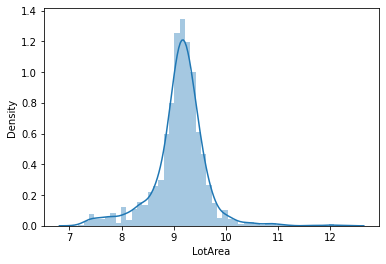

In [20]:
# Distribusi sesudah
sns.distplot(numerical_df['LotArea'])

7. Untuk data non-numerik, dapat bermacam-macam. Jika diperhatikan, dalam kasus ini ada 2 kemungkinan tipe data. Yaitu kategorikal dan ordinal (kategori yang memiliki urutan, misal level 1, level 2, level 3). Sehingga, perlu kita cek apakah nilai pada fitur tersebut termasuk kategorikal atau ordinal. Biasanya kita tahu hal ini dari dokumentasi data.

a. Salah satu variabel yang termasuk ordinal adalah variabel `ExterCond` yang memiliki nilai `"Po"=Poor, "Fa"=Fair, dst`. Ubahlah nilai ['Po', 'Fa', 'TA', 'Gd', 'Ex'] dengan nilai [0, 1, 2, 3, 4] dengan urutan `'Po' = 0 `

In [27]:
# Your code here

categorical_df['ExterCond'] = categorical_df['ExterCond'].map({'Po':0,'Fa':1,
                                                                'TA':2,'Gd':3,
                                                                'Ex':4})

In [28]:
categorical_df.ExterCond.head()

0    2
1    2
2    2
3    2
4    2
Name: ExterCond, dtype: int64

---
### Challenge, Tidak Dinilai
* Setelah nomor 5, kita tidak melakukan transformasi atau normalisasi dengan baik. Lalu, juga masih terdapat tahapan-tahapan lainnya yang sekiranya diperlukan seperti:
- Menghapus/mengganti nilai outlier.
- Transformasi dan Normalisasi untuk tiap-tiap variabel numerik.
- Pengecekan dan transformasi variabel non-numerik, termasuk kategorikal atau ordinal.
- Penggabungan kembali data ke satu dataset.
Jika anda ingin, silakan lakukan langkah-langkah tersebut. Sampai tahap ini, kita masih tidak tahu apakah jawaban dapat benar atau salah (Mungkin juga langkah-langkah yang kami berikan tidak sepenuhnya benar). Silakan cari referensi mengapa hal ini dan itu perlu dilakukan.

### Bonus 2
* Buatlah script pada python untuk kasus ini yang terdiri dari file .py sebagaimana yang dijelaskan pada pertemuan terakhir. Lalu anda dapat meng-upload file-file yang anda buat di gdrive atau github(kalau sudah bisa). Lalu lampirkan link file tersebut disini.

In [ ]:
# Bisa kerjakan challenge disini dan tambah cell baru


In [ ]:
# Lampirkan link file bonus 2 disini